# Movielens rating prediction

### import required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### reading all data

In [4]:
movies = pd.read_csv('movies.dat', sep = '::', engine='python', header = None)
users = pd.read_csv('users.dat', sep = '::', engine='python', header = None)
ratings = pd.read_csv('ratings.dat', sep = '::', engine='python', header= None)

### Basic EDA

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3883 non-null   int64 
 1   1       3883 non-null   object
 2   2       3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [6]:
movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
users.head()

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       6040 non-null   int64 
 1   1       6040 non-null   object
 2   2       6040 non-null   int64 
 3   3       6040 non-null   int64 
 4   4       6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   0       1000209 non-null  int64
 1   1       1000209 non-null  int64
 2   2       1000209 non-null  int64
 3   3       1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


#### renaming all the columns

In [18]:
movies.columns = ['MovieID','Title','Genres']
users.columns = ['UserID','Gender','Age','Occupation','Zip-code']
ratings.columns = ['UserID','MovieID','Rating','Timestamp']

In [11]:
movies.tail()

,MovieId,Title,Genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tiger-land (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [12]:
users.tail()

,UserId,Gender,Age,Occupation,Zip-code
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [13]:
ratings.tail()

,UserID,MovieID,Rating,Timestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


### create master data

In [16]:
master_data = ratings.merge(users, on = 'UserID', how = 'left')

In [17]:
master_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [19]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
master_data = master_data.merge(movies, on = 'MovieID', how = 'left')

In [21]:
master_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [22]:
master_data.shape

(1000209, 10)

In [23]:
#checking for nulls
master_data.isnull().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
Title         0
Genres        0
dtype: int64

### Age distribution

In [24]:
master_data.Age.value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

In [25]:
age_grp_data = master_data.groupby('Age')['UserID'].count().reset_index()

In [26]:
age_grp_data

,Age,UserID
0,1,27211
1,18,183536
2,25,395556
3,35,199003
4,45,83633
5,50,72490
6,56,38780


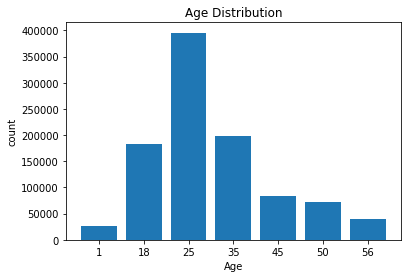

In [28]:
## using bar plot to visualize age distribution
plt.bar(age_grp_data.Age.astype('str'), age_grp_data.UserID)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution')
plt.show()

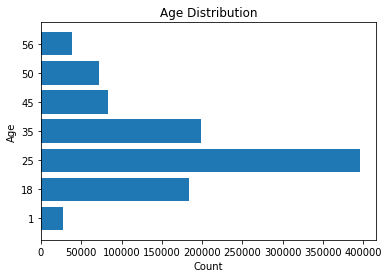

In [30]:
## using bar plot to visualize age distribution
plt.barh(age_grp_data.Age.astype('str'), age_grp_data.UserID)
plt.xlabel('Count')
plt.ylabel('Age')
plt.title('Age Distribution')
plt.show()

In [31]:
toy_story_data = master_data[master_data.Title.str.contains('Toy Story')]

In [32]:
toy_story_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
40,1,1,5,978824268,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
50,1,3114,4,978302174,F,1,10,48067,Toy Story 2 (1999),Animation|Children's|Comedy
203,3,3114,3,978298103,M,25,15,55117,Toy Story 2 (1999),Animation|Children's|Comedy
469,6,1,4,978237008,F,50,9,55117,Toy Story (1995),Animation|Children's|Comedy
581,8,1,4,978233496,M,25,12,11413,Toy Story (1995),Animation|Children's|Comedy


In [33]:
toy_story_data.Title.unique()

array(['Toy Story (1995)', 'Toy Story 2 (1999)'], dtype=object)

In [34]:
toy_story_data.Rating.value_counts()

5    1544
4    1413
3     559
2     105
1      41
Name: Rating, dtype: int64

In [36]:
toy_story_grp_data = toy_story_data.groupby('Rating')['UserID'].count().reset_index()

In [37]:
toy_story_grp_data.columns = ['Rating','cnt']

In [38]:
toy_story_grp_data

,Rating,cnt
0,1,41
1,2,105
2,3,559
3,4,1413
4,5,1544


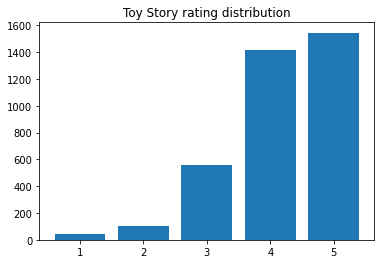

In [39]:
plt.bar(toy_story_grp_data.Rating.astype('str'), toy_story_grp_data.cnt)
plt.title('Toy Story rating distribution')
plt.show()

In [41]:
toy_story_data.Rating.describe()

count    3662.000000
mean        4.178045
std         0.870769
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

#### user rating for movie toy story is 4.17

### top 25 movies by viewership rating

In [42]:
top_25_movies = master_data.groupby('Title').size().sort_values(ascending=False)[:25]
top_25_movies.head()

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
dtype: int64

<AxesSubplot:xlabel='Title'>

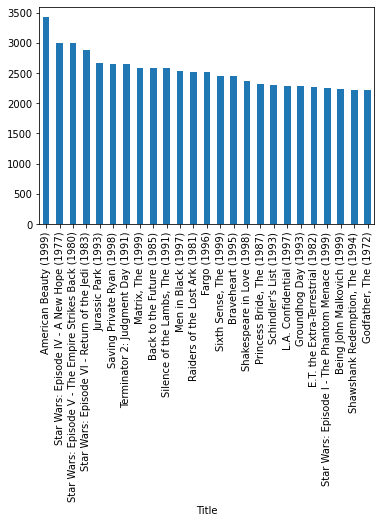

In [43]:
top_25_movies.plot(kind = 'bar')

<AxesSubplot:ylabel='Title'>

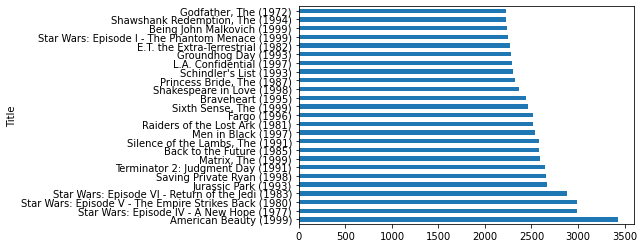

In [44]:
top_25_movies.plot(kind = 'barh')

In [45]:
top_25_movies1 = master_data.groupby('Title')['Rating'].agg(['count','mean']).reset_index()

In [46]:
top_25_movies1.head()

,Title,count,mean
0,"$1,000,000 Duck (1971)",37,3.027027
1,'Night Mother (1986),70,3.371429
2,'Til There Was You (1997),52,2.692308
3,"'burbs, The (1989)",303,2.910891
4,...And Justice for All (1979),199,3.713568


In [47]:
top_25_movies1.sort_values(['count','mean'], ascending=False, inplace = True)

In [48]:
top_25_movies1.head(5)

,Title,count,mean
127,American Beauty (1999),3428,4.317386
3153,Star Wars: Episode IV - A New Hope (1977),2991,4.453694
3154,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977
3155,Star Wars: Episode VI - Return of the Jedi (1983),2883,4.022893
1789,Jurassic Park (1993),2672,3.763847


In [49]:
top_25_movies1 = top_25_movies1.head(25)

In [50]:
top_25_movies1.columns = ['Title','no_of_ratings','avg rating']

In [51]:
top_25_movies1.head()

,Title,no_of_ratings,avg rating
127,American Beauty (1999),3428,4.317386
3153,Star Wars: Episode IV - A New Hope (1977),2991,4.453694
3154,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977
3155,Star Wars: Episode VI - Return of the Jedi (1983),2883,4.022893
1789,Jurassic Park (1993),2672,3.763847


### ratings for movies reviewed by user 2696

In [52]:
user_2696_data = master_data[master_data.UserID == 2696]

In [53]:
user_2696_data.shape

(20, 10)

In [54]:
user_2696_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
440667,2696,1258,4,973308710,M,25,7,24210,"Shining, The (1980)",Horror
440668,2696,1270,2,973308676,M,25,7,24210,Back to the Future (1985),Comedy|Sci-Fi
440669,2696,1617,4,973308842,M,25,7,24210,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
440670,2696,1625,4,973308842,M,25,7,24210,"Game, The (1997)",Mystery|Thriller
440671,2696,1644,2,973308920,M,25,7,24210,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller


In [56]:
movies_user_2696 = master_data[master_data.MovieID.isin(user_2696_data.MovieID)][['Title','Rating']]

In [57]:
movies_user_2696.shape

(17740, 2)

In [58]:
movies_user_2696 = movies_user_2696.groupby(['Title'])['Rating'].mean().reset_index()

In [59]:
movies_user_2696

,Title,Rating
0,Back to the Future (1985),3.990321
1,Basic Instinct (1992),3.541944
2,"Client, The (1994)",3.392233
3,Cop Land (1997),3.359756
4,"Devil's Advocate, The (1997)",3.435835
5,E.T. the Extra-Terrestrial (1982),3.965183
6,"Game, The (1997)",3.913832
7,I Know What You Did Last Summer (1997),2.631579
8,I Still Know What You Did Last Summer (1998),2.203390
9,JFK (1991),3.755291


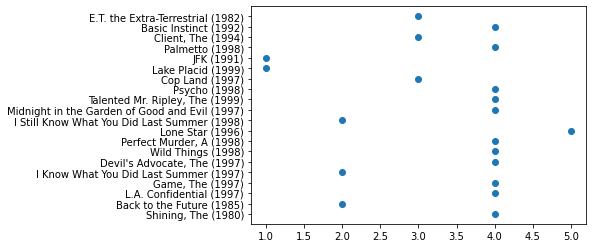

In [61]:
plt.scatter(user_2696_data.Rating, user_2696_data.Title)
plt.show()

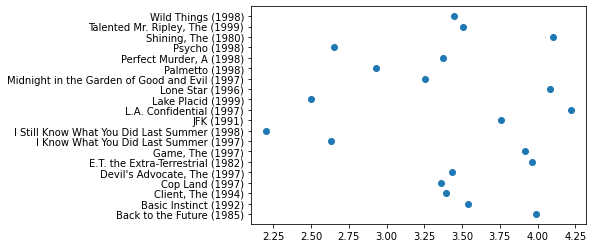

In [62]:
plt.scatter(movies_user_2696.Rating, movies_user_2696.Title)
plt.show()

### getting unique genres

In [65]:
genres = movies.Genres.str.split('|')

In [66]:
len(genres)

3883

In [67]:
unique_genres = []
for val in genres:
    for g in val:
        if g not in unique_genres:
            unique_genres.append(g)

len(unique_genres)

18

In [68]:
unique_genres

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Documentary',
 'War',
 'Musical',
 'Mystery',
 'Film-Noir',
 'Western']

['Animation', "Children's", 'Comedy']

In [72]:
def get_genre(df, u_genre):
    
    temp = df.copy()
    for i in u_genre:
        temp.loc[temp.Genres.str.contains(i), i] = 1
    
    temp.fillna(0, inplace = True)
    return temp

In [104]:
master_data_final = get_genre(master_data, unique_genres)
master_data_final.shape

(1000209, 28)

In [75]:
master_data_final.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres', 'Animation', 'Children's',
       'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical',
       'Mystery', 'Film-Noir', 'Western'],
      dtype='object')

In [77]:
master_data_final[['Genres']+unique_genres].head()

,Genres,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Animation|Children's|Musical,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Musical|Romance,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
master_data_final.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres', 'Animation', 'Children's',
       'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical',
       'Mystery', 'Film-Noir', 'Western'],
      dtype='object')

In [105]:
master_data_final.drop(['Genres'], axis = 1, inplace = True)

In [106]:
master_data_final.Age = master_data_final.Age.astype('str')
master_data_final.Occupation = master_data_final.Occupation.astype('str')

In [107]:
master_data_final = pd.concat([master_data_final.drop(['Age','Gender','Occupation'], axis = 1),
                               pd.get_dummies(master_data_final[['Age','Gender','Occupation']])], axis = 1)

In [108]:
master_data_final.shape

(1000209, 54)

In [109]:
master_data_final.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Zip-code', 'Title',
       'Animation', 'Children's', 'Comedy', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi',
       'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western',
       'Age_1', 'Age_18', 'Age_25', 'Age_35', 'Age_45', 'Age_50', 'Age_56',
       'Gender_F', 'Gender_M', 'Occupation_0', 'Occupation_1', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_2', 'Occupation_20', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9'],
      dtype='object')

### applying degree of freedom

In [110]:
master_data_final.drop(['Gender_M','Age_1','Occupation_0'], axis = 1, inplace = True)

In [111]:
master_data_final.head()

,UserID,MovieID,Rating,Timestamp,Zip-code,Title,Animation,Children's,Comedy,Adventure,...,Occupation_19,Occupation_2,Occupation_20,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9
0,1,1193,5,978300760,48067,One Flew Over the Cuckoo's Nest (1975),0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,48067,James and the Giant Peach (1996),1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,914,3,978301968,48067,My Fair Lady (1964),0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,3408,4,978300275,48067,Erin Brockovich (2000),0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,48067,"Bug's Life, A (1998)",1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
X = master_data_final.drop(columns = ['UserID','MovieID','Rating','Timestamp','Zip-code','Title'])
y = master_data_final.Rating

In [113]:
X.shape

(1000209, 45)

In [ ]:
y.shape